# Predykcja wydajności energetycznej

Dokonuję analizy energetycznej wykorzystując 12 różnych kształtów budynków symulowanych w programie Ecotect [1]. Budynki różnią się między innymi obszarem oszklenia, rozkładem powierzchni oszklenia i orientacją. 
Zestaw danych obejmuje 768 próbek i 8 funkcji, których celem jest przewidzenie dwóch odpowiedzi o wartościach rzeczywistych.
Informacje o cechach/feature'ach w zbiorze:
Zestaw danych zawiera osiem atrybutów (lub funkcji oznaczonych jako X1 ... X8) oraz wartości wyjściowej (oznaczone jako y1).
Celem jest wykorzystanie ośmiu cech do wyznaczenia wartości wyjściowej.
<br>
Konkretnie:
<br>
- X1 Względna zwartość
- X2 Powierzchnia
- X3 Obszar ściany
- X4 Powierzchnia dachu
- X5 Wysokość całkowita
- X6 Orientacja
- X7 Obszar szklenia
- X8 Rozkład powierzchni oszklenia
- y1 Obciążenie grzewcze

<br>
[1] - A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012
<br>
Źródło: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

# Kod programu

In [54]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [55]:
df = pd.read_excel("ENB2012_data.xlsx")
df = df.iloc[:, :-1]  # exclude output value Y2
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


## Histogramy

C:\Anaconda3\envs\data_science\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227DA30F508>,
      dtype=object)

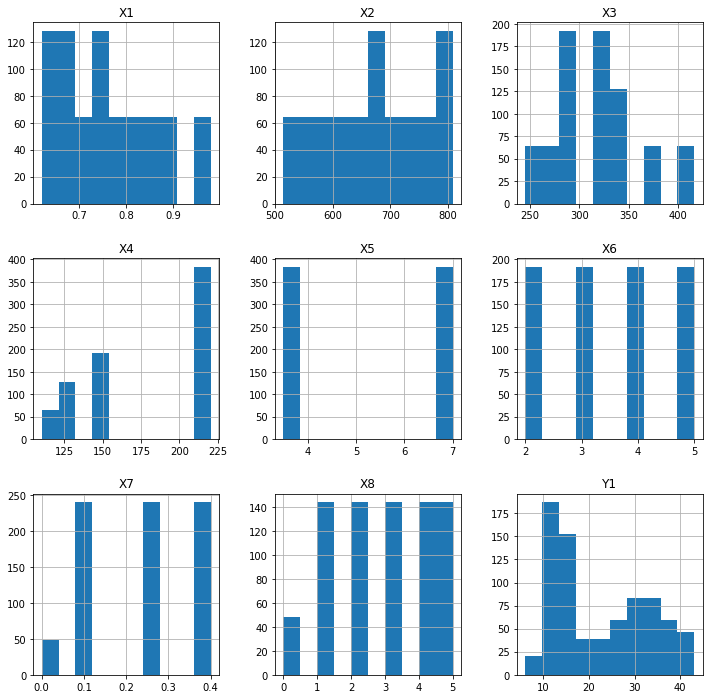

In [56]:
ax = plt.figure(figsize=(12,12)).gca()
df.hist(ax=ax)

## Korelacje pomiędzy cechami a wartością wyjściową (współczynnik korelacji Pearsona)

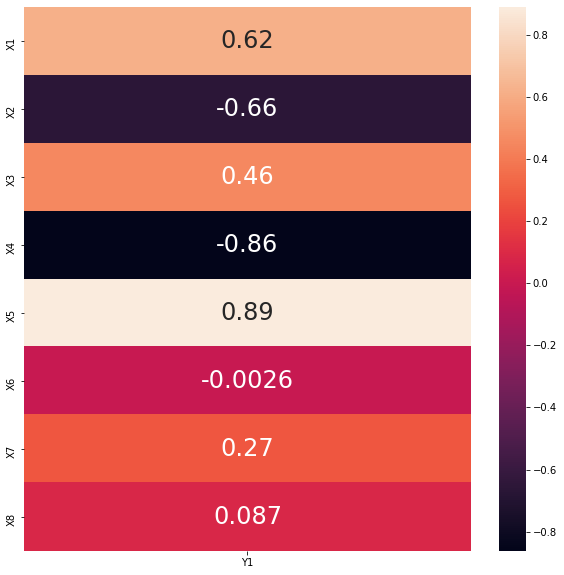

In [57]:
df_corr_y1 = df.corr()['Y1'][:-1]
#set fig size
fig, ax = plt.subplots(figsize=(10,10))
#plot matrix
sns.heatmap(df_corr_y1.to_frame(),annot=True, annot_kws={'size':24})
plt.show()

## Przygotowanie zbioru treningowego i testowego

In [58]:
output = "Y1"
features = list(df.columns)
features.remove(output)

X = df[features].to_numpy()
y = df[output].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Regresja liniowa
$y = b + z_1x_1 + z_2x_2 + ... $

Współczynnik dopasowania R^2 do zbioru testowego: 0.9121810593690274
Współczynniki regresji: [-6.20562948e+01 -1.32681318e+11  1.32681318e+11  2.65362636e+11
  4.12368477e+00 -3.23452728e-02  2.01431378e+01  2.11123455e-01]
Bias: 79.9987825732899


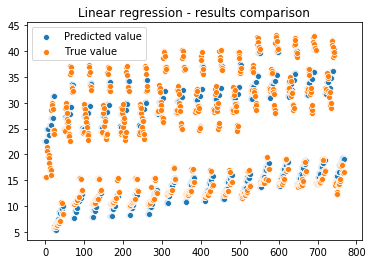

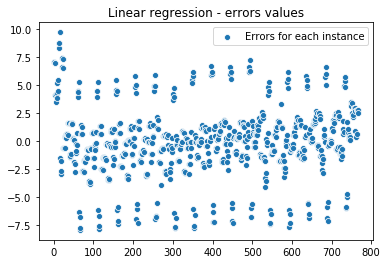

In [74]:
reg = LinearRegression().fit(X_train, y_train)
print("Współczynnik dopasowania R^2 do zbioru testowego:", reg.score(X_test, y_test))
print("Współczynniki regresji:", reg.coef_)
print("Bias:", reg.intercept_)

y_to_plot = reg.predict(X)
sns.scatterplot(
    x=df.index,
    y=y_to_plot,
    label="Predicted value"
)
sns.scatterplot(
    x=df.index,
    y=y,
    label="True value"
)
plt.title("Linear regression - results comparison")
plt.legend()
plt.show()

sns.scatterplot(
    x=df.index,
    y=y_to_plot - y,
    label="Errors for each instance"
)
plt.title("Linear regression - errors values")
plt.legend()
plt.show()

### Regresja wielomianowa - spośród wszystkich daje najlepszy wynik
$y = b + z_1x_1 + z_2x_2 + z_3x_1^2 + z_4x_2^2 + z_5x_1x_2 + ... $

Współczynnika dopasowania R^2 do zbioru testowego 0.975827051479881
Współczynniki regresji: [-1.10113436e+09 -1.19641816e+07  7.24116522e+04 -8.97213854e+04
 -2.25073423e+05 -1.84519791e+05  1.09980758e+00  6.82257308e+01
  4.69295803e+00 -1.71358915e+05  2.55261952e+05 -2.55607558e+05
 -4.68884839e+05  8.91455425e+05  2.42272464e+00  1.11556288e+01
  1.94348609e+00  9.48167217e+07 -8.97195317e+07 -1.64369417e+08
 -4.24786869e+05  2.22804458e+04 -2.38933340e+04 -1.65002641e+05
 -5.09719010e+06 -3.54583463e+07  4.26060802e+05 -2.22804415e+04
  2.38933976e+04  1.65002638e+05 -5.05278971e+07  8.46972710e+05
 -4.45609037e+04  4.77863871e+04  3.30005270e+05 -1.21893779e+04
 -4.84865506e-01 -5.62033873e+00 -2.61855300e-01 -8.62950522e-02
  2.97883144e+00  8.89664385e-02 -1.84885043e+01 -6.57174763e-01
 -3.75386451e-01]
Bias: 1113906294.7019076


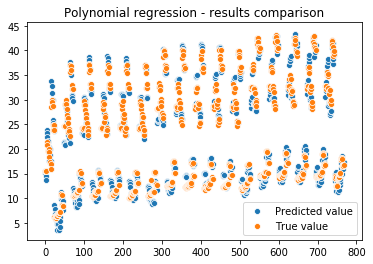

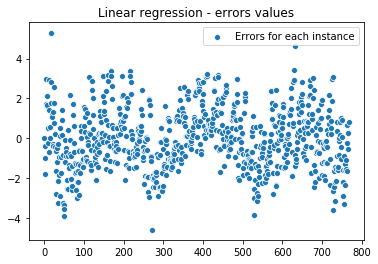

In [75]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression())])

model = model.fit(X_train, y_train)
print("Współczynnika dopasowania R^2 do zbioru testowego", model.score(X_test, y_test))
print("Współczynniki regresji:", model.named_steps['linear'].coef_)
print("Bias:", model.named_steps['linear'].intercept_)

y_to_plot = model.predict(X)
sns.scatterplot(
    x=df.index,
    y=y_to_plot,
    label="Predicted value"
)
sns.scatterplot(
    x=df.index,
    y=y,
    label="True value"
)
plt.title("Polynomial regression - results comparison")
plt.legend()
plt.show()

sns.scatterplot(
    x=df.index,
    y=y_to_plot - y,
    label="Errors for each instance"
)
plt.title("Linear regression - errors values")
plt.legend()
plt.show()

### Regresja metodą stochastycznego spadku gradientowego

Współczynnika dopasowania do zbioru testowego R^2 0.9084300528965823
Współczynniki regresji: [-2.70025906 -1.23506295  1.52294489 -1.99847004  7.65925443 -0.0291243
  2.6928316   0.33828227]
Bias: [22.15035059]


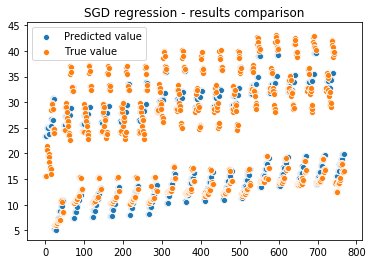

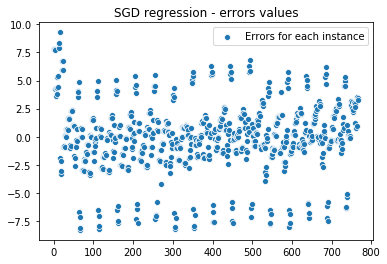

In [76]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('regression', SGDRegressor(
        penalty='elasticnet', alpha=0.01, l1_ratio=0.25, tol=1e-4)  # SGD regression with elasticnet regularization penalty
    )
])

model = model.fit(X_train, y_train)
print("Współczynnika dopasowania do zbioru testowego R^2", model.score(X_test, y_test))
print("Współczynniki regresji:", model.named_steps['regression'].coef_)
print("Bias:", model.named_steps['regression'].intercept_)

y_to_plot = model.predict(X)
sns.scatterplot(
    x=df.index,
    y=y_to_plot,
    label="Predicted value"
)
sns.scatterplot(
    x=df.index,
    y=y,
    label="True value"
)
plt.title("SGD regression - results comparison")
plt.legend()
plt.show()

sns.scatterplot(
    x=df.index,
    y=y_to_plot - y,
    label="Errors for each instance"
)
plt.title("SGD regression - errors values")
plt.legend()
plt.show()